## A real-valued problem and experimental analysis


### Sphere

A standard sanity-check test problem for real-valued genetic algorithms. Given a problem size `n`, the search space is $R^n$ and the goal is to find the origin.

We'll follow the same approach as in *Onemax*.

In [1]:
from PTO import solve, random

### Defining a generator

Our generator must generate real vectors of size `n`. To keep things simple for now, we fix `n` = 10. Later, we'll see how to vary this.

In [2]:
def randsol():
    return [random.uniform(-1,1) for x in range(10)]

### Defining a fitness function

Our solvers *maximise*, so we take the negative of the usual *sphere* objective function.

In [3]:
fitness = lambda x: -sum(xi**2.0 for xi in x)

### Testing our generator and fitness

In [4]:
def pprint_vec(v):
    return ", ".join(map((lambda vi: "%.2f" % vi), v))

for i in range(5):
    x = randsol()
    print("Random solution: fitness %.3f; " % fitness(x) + pprint_vec(x))

Random solution: fitness -4.517; -0.87, -0.81, -0.91, 0.60, -0.24, -0.31, 0.86, 0.18, -0.26, -0.97
Random solution: fitness -4.218; 0.75, 0.64, 0.51, -0.17, -0.58, -0.66, -0.69, -0.76, -0.98, -0.42
Random solution: fitness -3.333; -0.32, 0.22, 0.23, -0.81, -0.53, -0.92, -0.22, 0.33, 0.56, 0.93
Random solution: fitness -2.826; 0.89, -0.40, 0.13, -0.43, -0.66, 0.03, 0.31, 0.82, -0.22, 0.66
Random solution: fitness -4.044; 0.93, 0.60, 0.26, 0.52, 0.68, -0.62, 0.81, -0.09, 0.95, -0.24


### Optimization

We are ready to use the `solve` function.

In [5]:
ind, fit = solve(randsol, fitness, solver="EA")
print(str(fit) + ": " + pprint_vec(ind))

-0.773725411393: 0.55, -0.28, 0.05, -0.10, -0.07, 0.36, 0.37, -0.06, 0.04, 0.33


### Variant generators

One of the most interesting aspects of PTO is the generator function itself. Users can write their problem knowledge into the generator. It is interesting to consider alternative generators for the same problem. Here, we'll make a new generator and compare its behaviour.

In [6]:
def randsol2(): # uniform initialisation by random walk (induces fine-grained mutation)
    problem_size = 10
    sol=[random.uniform(-1,1) for x in range(problem_size)] # controllable start: starting point is in the trace
    for x in range(20): # random walk of 20 steps
         sol = [sol[i] + random.uniform(-0.1,0.1) for i in range(problem_size)] # step-size 0.1
    return sol

In [7]:
ind, fit = solve(randsol2, fitness, solver="EA")
print(str(fit) + ": " + pprint_vec(ind))

-0.0211336416316: 0.05, -0.05, -0.02, 0.07, 0.02, -0.03, 0.03, -0.04, -0.05, -0.07


### Trace types

PTO also provides two types of *program trace* representations. 

A *linear* trace is similar to that used in PODI (McDermott  & Carroll, 2013). It records random decisions sequentially. Hence it suffers from the same type of *ripple effect* as in grammatical evolution. A core contribution of PTO is the use of the *structured trace* which takes account of the structure of the generator when recording the random decisions, allowing it to make "smart" decisions when editing a trace. The structured trace is the default option. The linear trace is provided only for experimental comparison, and is not intended for real-world use. We can choose to switch the structured trace on (default) or off as follows.

In [8]:
ind, fit = solve(randsol, fitness, solver="HC", effort=1.5, str_trace=False)
print(str(fit) + ": " + pprint_vec(ind))
ind, fit = solve(randsol, fitness, solver="HC", effort=1.5, str_trace=True)
print(str(fit) + ": " + pprint_vec(ind))

-0.361988258171: 0.19, -0.06, -0.22, 0.08, -0.07, 0.10, -0.23, -0.27, -0.32, 0.15
-0.87976198418: 0.13, 0.33, 0.36, 0.17, 0.14, -0.58, -0.44, -0.06, 0.12, -0.15


### Experiments and analysis

PTO provides some built-in methods for running experiments to compare solvers, trace types and generators.

In [9]:
%matplotlib inline

from PTO import plot_runs, compare_all, make_table, stat_summary, plot_scalability

### `plot_runs`

Do some runs, and show the change in fitness during runs, averaged across runs.

10
10
10
10
10
10
10
10
10
10


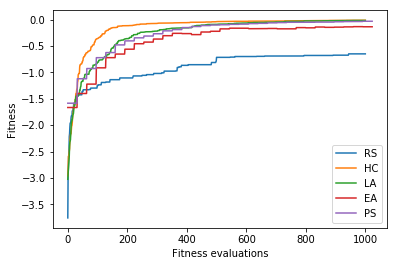

In [10]:
plot_runs(randsol, fitness, num_runs=10)

### `compare_all`

Do a *permutation* of hyperparameters. It can try variant generators, search methods (solvers) and trace types. In the example below, we compare two generators with all solvers. By default, it tries only the structured trace.

After, we can print the results in a table with `make_table`.

In [11]:
results = compare_all(fitness, [randsol, randsol2], methods=["RS", "HC", "LA", "EA", "PS"], budget=1000, num_runs=2) 
make_table(results) # print

10
10
10
10
(None, True, 'randsol', 'EA'): mean -0.13 std 0.01 min -0.14 med -0.13 max -0.13
(None, True, 'randsol', 'HC'): mean -0.01 std 0.00 min -0.01 med -0.01 max -0.01
(None, True, 'randsol', 'LA'): mean -0.02 std 0.01 min -0.02 med -0.02 max -0.01
(None, True, 'randsol', 'PS'): mean -0.03 std 0.01 min -0.03 med -0.03 max -0.02
(None, True, 'randsol', 'RS'): mean -0.63 std 0.05 min -0.68 med -0.63 max -0.58
(None, True, 'randsol2', 'EA'): mean -0.02 std 0.00 min -0.02 med -0.02 max -0.02
(None, True, 'randsol2', 'HC'): mean -0.00 std 0.00 min -0.00 med -0.00 max -0.00
(None, True, 'randsol2', 'LA'): mean -0.02 std 0.02 min -0.04 med -0.02 max -0.00
(None, True, 'randsol2', 'PS'): mean -0.01 std 0.00 min -0.01 med -0.01 max -0.01
(None, True, 'randsol2', 'RS'): mean -0.82 std 0.03 min -0.85 med -0.82 max -0.80


### Scalability, `problem_size`, and `compare_all`

In some problems it's natural to talk about instances of the problem at different problem sizes. For cases like this, we may define our generator and fitness to take a `problem_size` argument. We can then use `compare_all` to do some runs varying some hyperparameters, including problem sizes, and afterwards plot the results over different sizes, using `plot_scalability`. To demonstrate, we'll make new versions of our generators and fitness function which accept a problem size.

In [12]:
def fitness_n(x, problem_size):
    return -sum(xi**2.0 for xi in x)

def randsol_n(problem_size):
    return [random.uniform(-1,1) for x in range(problem_size)]
    
def randsol2_n(problem_size): # uniform initialisation by random walk (induces finely-grained mutation)
    sol=[random.uniform(-1,1) for x in range(problem_size)] # controllable start: starting point is the trace
    for x in range(20): # random walk of 20 steps
         sol = [sol[i] + random.uniform(-0.1,0.1) for i in range(problem_size)] # step-size 0.1
    return sol

In [13]:
sizes = [2, 4, 8, 16, 32]

results_methods = compare_all(fitness_n, 
                              [randsol_n], 
                              methods=["RS", "HC", "LA", "EA", "PS"], # do all solvers
                              sizes=sizes,
                              budget=1000, 
                              num_runs=2, 
                              print_progress=False)

10
10
10
10
10
10
10
10
10
10


In [14]:
results_traces = compare_all(fitness_n, 
                             [randsol_n], 
                             str_traces=[False, True], # do structured trace both off and on
                             sizes=sizes,
                             budget=1000, 
                             num_runs=2, 
                             print_progress=False)

In [15]:
results_generators = compare_all(fitness_n, 
                                 [randsol_n, randsol2_n], # do both generators
                                 sizes=sizes,
                                 budget=1000, 
                                 num_runs=2, 
                                 print_progress=False)

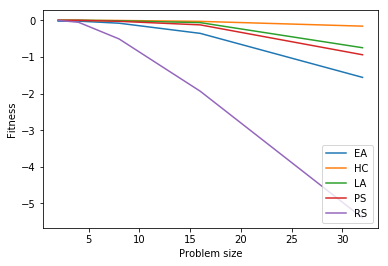

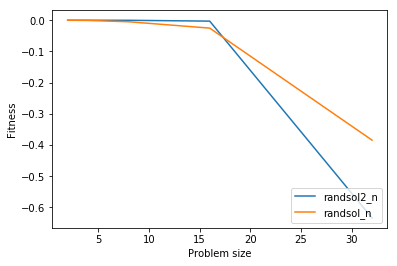

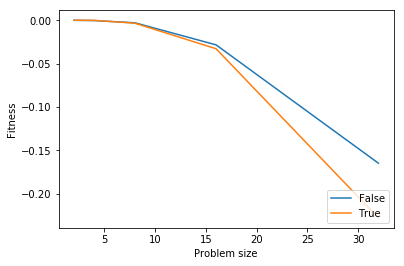

In [16]:
plot_scalability(results_methods)
plot_scalability(results_generators)
plot_scalability(results_traces)

**NB** if we make these new versions of the generators and fitness (accepting a `problem_size` argument), we must remember that when calling `solve` standalone (i.e. not inside `compare_all` or similar), `solve` will call the generator with no argument, and will call the fitness function with one argument, the individual. That is, it won't pass `problem_size`. If we wish to use the new versions with `solve`, one option is to use a *keyword* argument, which implies a default problem size, e.g. `def fitness(x, problem_size=10)`. Another is to fix the `problem_size` argument using `functools.partial`:

```
from functools import partial
randsol = partial(randsol_n, 10)
```

### Conclusions

We have seen a simple real-valued generator used it on a simple problem. And we have seen some tools for analysing large sets of results. And we have seen how to compare scalability for problems of the appropriate type. 